<a href="https://colab.research.google.com/github/mnassar/linkedin-queens-game/blob/main/Linkedin_Queens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solve Linkedin Colored Queens Game

## @author: mohamad nassar

## Nov 2024

#### game website: https://www.linkedin.com/games/queens/

In [1]:
!curl -L  https://drive.google.com/uc?id=1iS8oeZvFlu8WcyiyVOSb_vvBOP7FFS0x  --output queens198.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  135k  100  135k    0     0  57231      0  0:00:02  0:00:02 --:--:--  149k


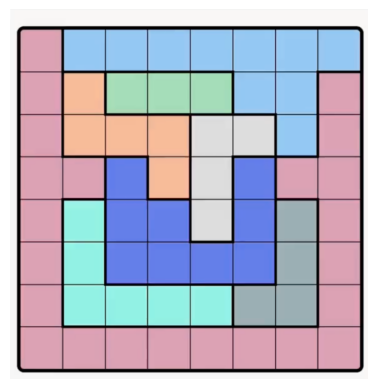

In [2]:
import cv2
from matplotlib import pyplot as plt
img_color = cv2.imread('queens198.png')
plt.imshow(img_color)
plt.axis("off")
plt.show()

In [3]:
print(img_color.shape)

(660, 638, 3)


In [4]:
# extract visually :-) (or replace with a CNN)
nb_squares_hor = 8
nb_squares_ver = 8
board = [['x' for j in range(nb_squares_hor)] for i in range(nb_squares_ver)]

In [5]:
# adjust for your img
shift_v = 75
shift_h = 40
stride = 77

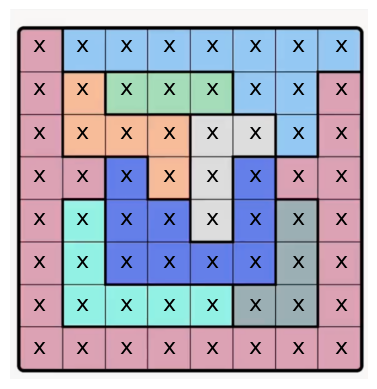

In [6]:
def draw(board, with_x = False):
  plt.imshow(img_color)
  plt.axis("off")

  for r in range(nb_squares_ver):
    for c in range(nb_squares_hor):
      if with_x or (not with_x and board[r][c] == 'Q'):
        plt.text(shift_h + c * stride, shift_v + r * stride, board[r][c], color="black",  fontsize=16) #weight="bold",
  plt.show()

draw(board, True)

In [7]:
# boilerplate func to extract color name from r,g,b

import webcolors
def closest_color(requested_color):
  min_colors = {}
  for name in webcolors.names("css3"):
      r_c, g_c, b_c = webcolors.name_to_rgb(name)
      rd = (r_c - requested_color[0]) ** 2
      gd = (g_c - requested_color[1]) ** 2
      bd = (b_c - requested_color[2]) ** 2
      min_colors[(rd + gd + bd)] = name
  return min_colors[min(min_colors.keys())]

['plum', 'lightskyblue', 'lightskyblue', 'lightskyblue', 'lightskyblue', 'lightskyblue', 'lightskyblue', 'lightskyblue']
['plum', 'burlywood', 'silver', 'silver', 'silver', 'lightskyblue', 'lightskyblue', 'plum']
['plum', 'burlywood', 'burlywood', 'burlywood', 'gainsboro', 'gainsboro', 'lightskyblue', 'plum']
['plum', 'plum', 'cornflowerblue', 'burlywood', 'gainsboro', 'cornflowerblue', 'plum', 'plum']
['plum', 'aquamarine', 'cornflowerblue', 'cornflowerblue', 'gainsboro', 'cornflowerblue', 'darkgrey', 'plum']
['plum', 'aquamarine', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'darkgrey', 'plum']
['plum', 'aquamarine', 'aquamarine', 'aquamarine', 'aquamarine', 'darkgrey', 'darkgrey', 'plum']
['plum', 'plum', 'plum', 'plum', 'plum', 'plum', 'plum', 'plum']


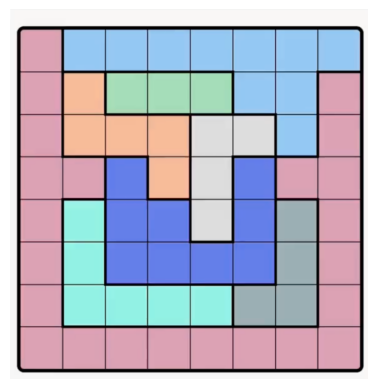

In [8]:
# extract img_str
img_list = []

for r in range(nb_squares_ver):
  img_row = []
  for c in range(nb_squares_hor):
    color = closest_color(img_color[shift_v + r * stride][shift_h + c * stride])
    img_row.append(color)
  img_list.append(img_row)

for r in (img_list):
  print(r)
# verify img_str is correct
plt.imshow(img_color)
plt.axis("off")
plt.show()


In [9]:
# construct domain for each color
from collections import defaultdict

color_squares = defaultdict(list)
for r in range(len(img_list)):
  for c in range(len(img_list[0])):
    color_squares[img_list[r][c]].append((r,c))


In [10]:
color_squares

defaultdict(list,
            {'plum': [(0, 0),
              (1, 0),
              (1, 7),
              (2, 0),
              (2, 7),
              (3, 0),
              (3, 1),
              (3, 6),
              (3, 7),
              (4, 0),
              (4, 7),
              (5, 0),
              (5, 7),
              (6, 0),
              (6, 7),
              (7, 0),
              (7, 1),
              (7, 2),
              (7, 3),
              (7, 4),
              (7, 5),
              (7, 6),
              (7, 7)],
             'lightskyblue': [(0, 1),
              (0, 2),
              (0, 3),
              (0, 4),
              (0, 5),
              (0, 6),
              (0, 7),
              (1, 5),
              (1, 6),
              (2, 6)],
             'burlywood': [(1, 1), (2, 1), (2, 2), (2, 3), (3, 3)],
             'silver': [(1, 2), (1, 3), (1, 4)],
             'gainsboro': [(2, 4), (2, 5), (3, 4), (4, 4)],
             'cornflowerblue': [(3, 2),
             

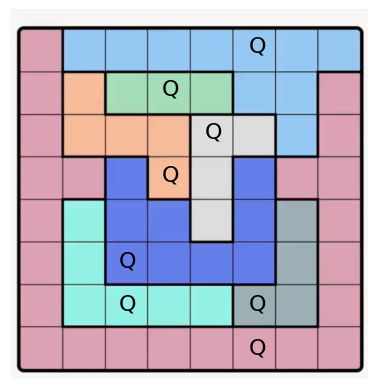

In [11]:
import random
board = [['x' for j in range(nb_squares_hor)] for i in range(nb_squares_ver)]

queens = {}
# place a queen in each row
for color in color_squares:
  (r,c) = random.choice (color_squares[color])
  queens[color] = (r,c)
  board[r][c] = 'Q'

draw(board)

In [12]:
queens

{'plum': (7, 5),
 'lightskyblue': (0, 5),
 'burlywood': (3, 3),
 'silver': (1, 3),
 'gainsboro': (2, 4),
 'cornflowerblue': (5, 2),
 'aquamarine': (6, 2),
 'darkgrey': (6, 5)}

Solved! after  11111 iterations


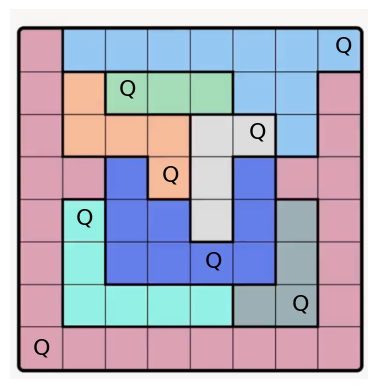

In [13]:
#local search
it = 0
while True:
  it +=1
  # count constraints per queen
  constraints = {}
  for q1 in queens:
    constraints[q1] = 0
    r1,c1 = queens[q1]
    for q2 in queens:
      if q1 != q2:
        r2, c2 = queens[q2]
        # are they adjacent? (i.e. norm inf. distance <= 1 )
        if max ( abs (r1 - r2), abs (c1 - c2)) == 1:
          constraints[q1] += 1
        elif r1 == r2 or c1 == c2:
          constraints[q1] += 1

  # print("before: ")
  # draw(board)

  # select a queen with a positive number of constraints
  candidates = [ color for color in constraints if constraints[color] > 0 ]
  if len (candidates) == 0:
    print ("Solved! after ", it, "iterations")
    draw(board)
    break

  move = random.choice( candidates )
  # print ("it", it, ": ", move, queens[move], constraints[move])

  # print("after: ")
  #update board
  board[queens[move][0]][queens[move][1]] = 'x'
  # change position among same color squares
  queens[move] = random.choice(color_squares[move])
  board[queens[move][0]][queens[move][1]] = 'Q'
  # draw(board)
